# A Simple Example of Analyzing COVID-19 Data

## Data source: 

The data is downloaded from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

## Load data from S3

In [21]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340-2025-lab1/covid_data.csv') # load the data from s3
df.head() #show the top 5 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


## View data

In [22]:
df.shape #show the number of rows and columns 

(61900, 12)

In [23]:
df.info

<bound method DataFrame.info of           dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0      14/12/2020   14     12  2020    746       6             Afghanistan   
1      13/12/2020   13     12  2020    298       9             Afghanistan   
2      12/12/2020   12     12  2020    113      11             Afghanistan   
3      11/12/2020   11     12  2020     63      10             Afghanistan   
4      10/12/2020   10     12  2020    202      16             Afghanistan   
...           ...  ...    ...   ...    ...     ...                     ...   
61895  25/03/2020   25      3  2020      0       0                Zimbabwe   
61896  24/03/2020   24      3  2020      0       1                Zimbabwe   
61897  23/03/2020   23      3  2020      0       0                Zimbabwe   
61898  22/03/2020   22      3  2020      1       0                Zimbabwe   
61899  21/03/2020   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCod

In [24]:
df.describe

<bound method NDFrame.describe of           dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0      14/12/2020   14     12  2020    746       6             Afghanistan   
1      13/12/2020   13     12  2020    298       9             Afghanistan   
2      12/12/2020   12     12  2020    113      11             Afghanistan   
3      11/12/2020   11     12  2020     63      10             Afghanistan   
4      10/12/2020   10     12  2020    202      16             Afghanistan   
...           ...  ...    ...   ...    ...     ...                     ...   
61895  25/03/2020   25      3  2020      0       0                Zimbabwe   
61896  24/03/2020   24      3  2020      0       1                Zimbabwe   
61897  23/03/2020   23      3  2020      0       0                Zimbabwe   
61898  22/03/2020   22      3  2020      1       0                Zimbabwe   
61899  21/03/2020   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryC

# According to the program, we have 61900 rows and 12 columns. Both numeric and text columns exist, but most columns are numeric (there appears to be 8 numeric, including date, and 4 textual). My first impression is that cases, deaths, popdata, and the cumulative number columns appear to be the most important. There is a lot of data, so it might be worth exploring narrowing down the number of rows somehow.

In [25]:
df['cases'] #select a column 

0        746
1        298
2        113
3         63
4        202
        ... 
61895      0
61896      0
61897      0
61898      1
61899      1
Name: cases, Length: 61900, dtype: int64

In [26]:
df.sort_values(by='deaths') #sort data by a column

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
52925,25/05/2020,25,5,2020,-372,-1918,Spain,ES,ESP,46937060.0,Europe,16.255812
31909,24/08/2020,24,8,2020,237,-443,Kyrgyzstan,KG,KGZ,6415851.0,Asia,45.964284
29271,25/06/2020,25,6,2020,577,-31,Italy,IT,ITA,60359546.0,Europe,6.042126
31304,06/08/2020,6,8,2020,218,-12,Kosovo,XK,XKX,1798506.0,Europe,178.259066
28207,03/10/2020,3,10,2020,466,-5,Ireland,IE,IRL,4904240.0,Europe,97.711368
...,...,...,...,...,...,...,...,...,...,...,...,...
59241,18/04/2020,18,4,2020,30833,3770,United_States_of_America,US,USA,329064917.0,America,128.910430
16906,07/09/2020,7,9,2020,-8261,3800,Ecuador,EC,ECU,17373657.0,America,11.598019
44907,24/07/2020,24,7,2020,4546,3887,Peru,PE,PER,32510462.0,America,168.093582
44886,14/08/2020,14,8,2020,9441,3935,Peru,PE,PER,32510462.0,America,309.143561


In [27]:
df[0:5] #slice by rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [28]:
df[df['deaths']>5] # select rows by values 

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61754,13/08/2020,13,8,2020,75,18,Zimbabwe,ZW,ZWE,14645473.0,Africa,13.751690
61760,07/08/2020,7,8,2020,56,13,Zimbabwe,ZW,ZWE,14645473.0,Africa,15.506498
61763,04/08/2020,4,8,2020,154,10,Zimbabwe,ZW,ZWE,14645473.0,Africa,16.127851
61766,01/08/2020,1,8,2020,77,14,Zimbabwe,ZW,ZWE,14645473.0,Africa,11.942257


## Explore and clean data

In [29]:
df.info() # shows the data types and number of null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [30]:
df['date'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y') #change the data type to date with specific format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 13 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  object        
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

In [31]:
#rename columns
df = df.rename(columns={"popData2019": "pop", "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000": "cum","countriesAndTerritories":"country" }) 
df = df.rename(columns={'countryterritoryCode': 'regionCode'})
df.head()

,dateRep,day,month,year,cases,deaths,country,geoId,regionCode,pop,continentExp,cum,date
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,2020-12-14
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,2020-12-13
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2020-12-12
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,2020-12-11
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,2020-12-10


# I renamed the countryterritoryCode column to regionCode. Scroll down for missing value handling.

In [32]:
df.isnull().sum() #show the number of rows containing null value

dateRep            0
day                0
month              0
year               0
cases              0
deaths             0
country            0
geoId            275
regionCode       123
pop              123
continentExp       0
cum             2879
date               0
dtype: int64

In [33]:
# df = df.dropna() #drop null values
df.isnull().sum()

dateRep            0
day                0
month              0
year               0
cases              0
deaths             0
country            0
geoId            275
regionCode       123
pop              123
continentExp       0
cum             2879
date               0
dtype: int64

# I decided to not handle any of the 3400 null values to avoid any potential issues with my data. I commented out the dropna() call.

In [34]:
df['deaths'] #select a column 

0         6
1         9
2        11
3        10
4        16
         ..
61895     0
61896     1
61897     0
61898     0
61899     0
Name: deaths, Length: 61900, dtype: int64

In [35]:
df.sort_values(by='pop') #sorting by pop 

,dateRep,day,month,year,cases,deaths,country,geoId,regionCode,pop,continentExp,cum,date
25591,13/11/2020,13,11,2020,0,0,Holy_See,VA,VAT,815.0,Europe,0.0,2020-11-13
25592,12/11/2020,12,11,2020,0,0,Holy_See,VA,VAT,815.0,Europe,0.0,2020-11-12
25593,11/11/2020,11,11,2020,0,0,Holy_See,VA,VAT,815.0,Europe,0.0,2020-11-11
25594,10/11/2020,10,11,2020,0,0,Holy_See,VA,VAT,815.0,Europe,0.0,2020-11-10
25595,09/11/2020,9,11,2020,0,0,Holy_See,VA,VAT,815.0,Europe,0.0,2020-11-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60873,21/10/2020,21,10,2020,0,0,Wallis_and_Futuna,WF,NaN,NaN,Oceania,NaN,2020-10-21
60874,20/10/2020,20,10,2020,0,0,Wallis_and_Futuna,WF,NaN,NaN,Oceania,NaN,2020-10-20
60875,19/10/2020,19,10,2020,0,0,Wallis_and_Futuna,WF,NaN,NaN,Oceania,NaN,2020-10-19
60876,18/10/2020,18,10,2020,0,0,Wallis_and_Futuna,WF,NaN,NaN,Oceania,NaN,2020-10-18


In [36]:
df[df['pop']>100000000] # select rows by values 

,dateRep,day,month,year,cases,deaths,country,geoId,regionCode,pop,continentExp,cum,date
4598,14/12/2020,14,12,2020,1355,32,Bangladesh,BD,BGD,163046173.0,Asia,17.250328,2020-12-14
4599,13/12/2020,13,12,2020,1329,34,Bangladesh,BD,BGD,163046173.0,Asia,17.515897,2020-12-13
4600,12/12/2020,12,12,2020,1884,19,Bangladesh,BD,BGD,163046173.0,Asia,17.871011,2020-12-12
4601,11/12/2020,11,12,2020,1861,37,Bangladesh,BD,BGD,163046173.0,Asia,18.109594,2020-12-11
4602,10/12/2020,10,12,2020,2159,24,Bangladesh,BD,BGD,163046173.0,Asia,18.373936,2020-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59346,04/01/2020,4,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN,2020-01-04
59347,03/01/2020,3,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN,2020-01-03
59348,02/01/2020,2,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN,2020-01-02
59349,01/01/2020,1,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN,2020-01-01


In [37]:
df.describe() #statistical summary of the data

,day,month,year,cases,deaths,pop,cum,date
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000,61900
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586,2020-07-17 19:05:51.508885248
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587,2019-12-31 00:00:00
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526,2020-05-07 00:00:00
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045,2020-07-20 00:00:00
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719,2020-10-02 00:00:00
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210,2020-12-14 00:00:00
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240,NaN


In [38]:
df = df[(df['deaths']>=0) & (df['cases']>=0) & (df['cum']>=0)] #filter data
df.describe()

,day,month,year,cases,deaths,pop,cum,date
count,58959.000000,58959.000000,58959.0,58959.000000,58959.000000,5.895900e+04,58959.000000,58959
mean,15.648620,7.264642,2020.0,1212.754168,27.316135,4.124131e+07,66.402666,2020-07-24 05:47:15.414440704
min,1.000000,1.000000,2020.0,0.000000,0.000000,8.150000e+02,0.000000,2020-01-13 00:00:00
25%,8.000000,5.000000,2020.0,0.000000,0.000000,1.324820e+06,0.763241,2020-05-17 00:00:00
50%,15.000000,7.000000,2020.0,20.000000,0.000000,7.813207e+06,6.732521,2020-07-27 00:00:00
75%,23.000000,10.000000,2020.0,310.000000,5.000000,2.860872e+07,52.601692,2020-10-05 00:00:00
max,31.000000,12.000000,2020.0,234633.000000,4928.000000,1.433784e+09,1900.836210,2020-12-14 00:00:00
std,8.823967,2.840538,0.0,6941.109276,133.162595,1.537655e+08,162.373044,NaN


In [39]:
df['country'].value_counts() #show the count of unique values 

country
Mexico              337
Austria             337
Belgium             337
Sweden              337
Iceland             337
                   ... 
Comoros             214
Lesotho             201
Solomon_Islands      47
Marshall_Islands     34
Vanuatu              21
Name: count, Length: 212, dtype: int64

In [40]:
df = df[['country','cases','deaths','pop','cum','date']] # keep specific columns 
df.head()

,country,cases,deaths,pop,cum,date
0,Afghanistan,746,6,38041757.0,9.013779,2020-12-14
1,Afghanistan,298,9,38041757.0,7.052776,2020-12-13
2,Afghanistan,113,11,38041757.0,6.868768,2020-12-12
3,Afghanistan,63,10,38041757.0,7.134266,2020-12-11
4,Afghanistan,202,16,38041757.0,6.968658,2020-12-10


In [41]:
df.set_index('date',inplace=True) #define the index
df.head()

,country,cases,deaths,pop,cum
date,,,,,
2020-12-14,Afghanistan,746,6,38041757.0,9.013779
2020-12-13,Afghanistan,298,9,38041757.0,7.052776
2020-12-12,Afghanistan,113,11,38041757.0,6.868768
2020-12-11,Afghanistan,63,10,38041757.0,7.134266
2020-12-10,Afghanistan,202,16,38041757.0,6.968658


In [42]:
df.loc['2020-04-05'] #filter the data based on the index value

,country,cases,deaths,pop,cum
date,,,,,
2020-04-05,Afghanistan,35,1,38041757.0,0.646658
2020-04-05,Albania,29,2,2862427.0,8.978395
2020-04-05,Algeria,80,25,43053054.0,2.582860
2020-04-05,Andorra,27,1,76177.0,496.212768
2020-04-05,Angola,2,0,31825299.0,0.025137
...,...,...,...,...,...
2020-04-05,Uzbekistan,39,0,32981715.0,0.706452
2020-04-05,Venezuela,0,2,28515829.0,0.378737
2020-04-05,Vietnam,1,0,96462108.0,0.151355


In [43]:
df.to_csv('clean_data.csv') #store the cleaned data to local computer

# I displayed the deaths column, and it only showed death counts. I did not slice any columns, as we did that very early on in the code (we sliced 0:5). I sorted rows by pop, and Bangladesh was the highest. I then filtered rows by population over 100m, and the output showed noticeably less countries.

## Visualize data

### Distribution of the Data

array([[<Axes: title={'center': 'cases'}>,
        <Axes: title={'center': 'deaths'}>],
       [<Axes: title={'center': 'pop'}>, <Axes: title={'center': 'cum'}>]],
      dtype=object)

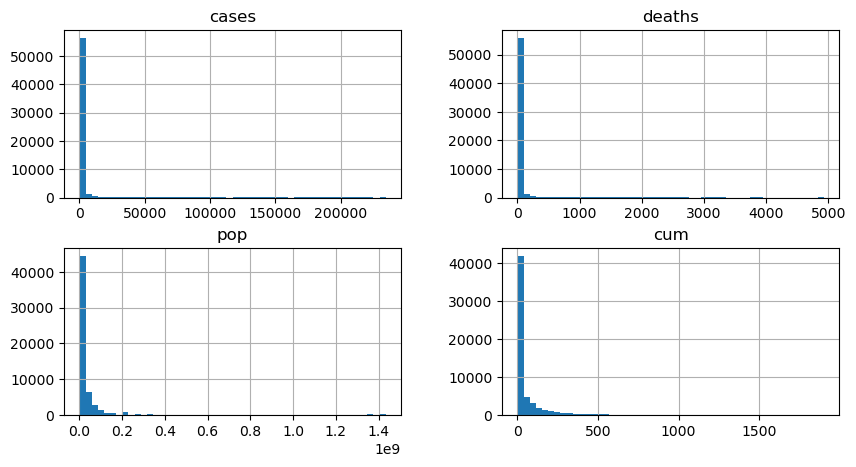

In [44]:
df.hist(layout=(2,2), figsize=(10, 5), sharey=False, sharex=False, bins=50) #use multiple charts to show the distribution of all columns

### The Sum of Case Numbers per Day

In [45]:
sum_cases_by_date = df.groupby('date')['cases'].sum() #aggregate the total case number per day
sum_cases_by_date.head()

date
2020-01-13    1
2020-01-14    1
2020-01-15    1
2020-01-16    0
2020-01-17    5
Name: cases, dtype: int64

<Axes: xlabel='date'>

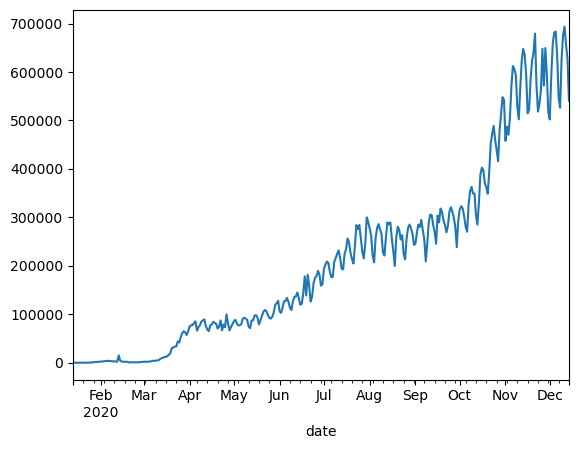

In [46]:
sum_cases_by_date.plot() #use a line chart to show the result

### The Top 10 Countries with the Highest Deaths

<Axes: xlabel='country'>

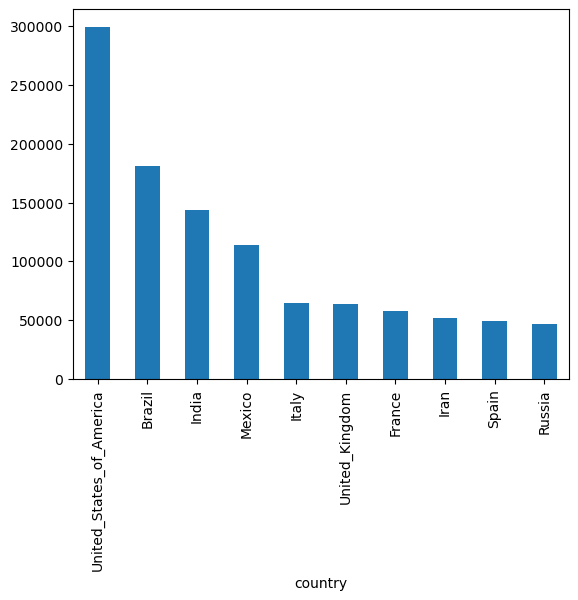

In [47]:
sum_deaths_by_country = df.groupby('country')['deaths'].sum() # calculate the total deaths per day
sum_deaths_by_country.nlargest(10).plot.bar() # use a bar chart to show the results of the top 10 countries 

### The USA Data Visualization

In [48]:
USA_data = df[df['country']=='United_States_of_America'] #select the USA data

<Axes: xlabel='date', ylabel='deaths'>

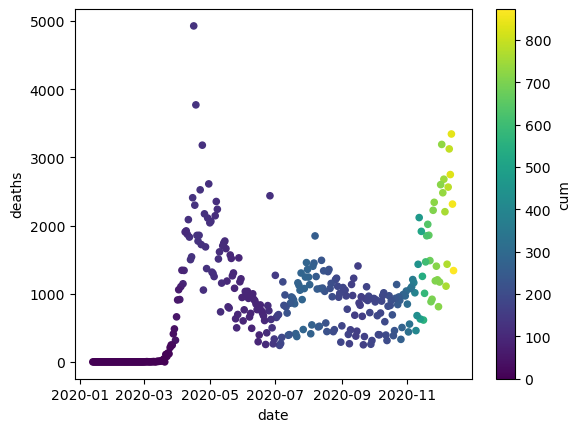

In [49]:
USA_data.reset_index().plot.scatter(x='date',y='deaths',c='cum') #use scatter plot to show the result

# We used groupby to show the sum of cases by day and then the top 10 countries with the highest reported deaths. These were visualized in line charts and bar charts respectively. The first one showed a somewhat steady increase in cases per day, with a big jump starting in October 2020 after a "flattening" over the summer. It appeared to be a somewhat sinusoidial graph, with the aforementioned steady increase over time. This may be due to deaths being reported more or less on weekends compared to week days. The next graph showed USA as the #1 nation with reported deaths, with around 300k. The 10th highest reporter of deaths only had around 50,000 deaths. USA, Brazil, India, Mexico appeared to be outliers compared to other countries. 